In [31]:
import pandas as pd
from tqdm import tqdm
import json
import numpy as np
import time
from copy import deepcopy
import matplotlib.pyplot as plt
import random

# Data Importation

## Ratings

In [2]:
business_json_path = 'yelp_dataset/yelp_academic_dataset_business.json'
checkin_json_path = 'yelp_dataset/yelp_academic_dataset_checkin.json'
review_json_path = 'yelp_dataset/yelp_academic_dataset_review.json'
tip_json_path = 'yelp_dataset/yelp_academic_dataset_tip.json'
user_json_path = 'yelp_dataset/yelp_academic_dataset_user.json'

#df_b = pd.read_json(business_json_path, lines=True)
#df_c = pd.read_json(checkin_json_path, lines=True)
#df_r = pd.read_json(review_json_path, lines=True)
#df_t = pd.read_json(tip_json_path, lines=True)
#df_u = pd.read_json(user_json_path, lines=True)

In [3]:
line_count = len(open(review_json_path).readlines())
user_ids, business_ids, stars, dates, texts = [], [], [], [], []
with open(review_json_path) as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        user_ids += [blob["user_id"]]
        business_ids += [blob["business_id"]]
        stars += [blob["stars"]]
        dates += [blob["date"]]
        texts += [blob["text"]]
df_ratings = pd.DataFrame(
    {"user_id": user_ids, "business_id": business_ids, "rating": stars, "date": dates, "text": texts}
)

100%|██████████| 8021122/8021122 [01:31<00:00, 87908.36it/s]


In [4]:
df_ratings

,user_id,business_id,rating,date,text
0,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,2015-04-15 05:21:16,"As someone who has worked with many museums, I..."
1,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,2013-12-07 03:16:52,I am actually horrified this place is still in...
2,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,2015-12-05 03:18:11,I love Deagan's. I do. I really do. The atmosp...
3,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,2011-05-27 05:30:52,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
4,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,2017-01-14 21:56:57,"Oh happy day, finally have a Canes near my cas..."
...,...,...,...,...,...
8021117,6DMFD3BRp-MVzDQelRx5UQ,XW2kaXdahICaJ27A0dhGHg,1.0,2019-12-11 01:07:06,"Fricken unbelievable, I ordered 2 space heater..."
8021118,_g6P8H3-qfbz1FxbffS68g,IsoLzudHC50oJLiEWpwV-w,3.0,2019-12-10 04:15:00,Solid American food with a southern comfort fl...
8021119,Scmyz7MK4TbXXYcaLZxIxQ,kDCyqlYcstqnoqnfBRS5Og,5.0,2019-06-06 15:01:53,I'm honestly not sure how I have never been to...
8021120,lBuAACBEThaQHQGMzAlKpg,VKVDDHKtsdrnigeIf9S8RA,3.0,2018-07-05 18:45:21,Food was decent but I will say the service too...


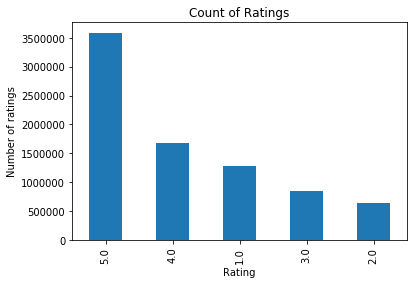

In [5]:
df_ratings.rating.value_counts().plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Number of ratings")
plt.title("Count of Ratings")
plt.show()

## Users

In [6]:
line_count = len(open(user_json_path).readlines())
users, names, review_counts, since, friends, useful, funny, cool, n_fans, years_elite, average_stars = [], [], [], [], [], [], [], [], [], [], []
with open(user_json_path) as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        users += [blob["user_id"]]
        names += [blob["name"]]
        review_counts += [blob["review_count"]]
        since += [blob["yelping_since"]]
        friends += [blob["friends"]]
        useful += [blob["useful"]]
        funny += [blob["funny"]]
        cool += [blob["cool"]]
        n_fans += [blob["fans"]]
        years_elite += [blob["elite"]]
        average_stars += [blob["average_stars"]]
        
df_users = pd.DataFrame(
    {"user_id": users, 
     "user_name": names,
     "user_review_count": review_counts,
     "user_yelp_since": since,
     "friends": friends,
     "useful_reviews": useful,
     "funny_reviews": funny,
     "cool_reviews": cool,
     "n_fans": n_fans,
     "years_elite": years_elite,
     "average_stars": average_stars})

100%|██████████| 1968703/1968703 [00:40<00:00, 48660.34it/s]


In [7]:
df_users

,user_id,user_name,user_review_count,user_yelp_since,friends,useful_reviews,funny_reviews,cool_reviews,n_fans,years_elite,average_stars
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",628,225,227,14,,3.57
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,"ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",790,316,400,27,"2008,2009,2010,2011,2012,2013",3.84
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",151,125,103,5,2010,3.44
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",233,160,84,6,2009,3.08
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,"3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",1265,400,512,78,"2009,2010,2011,2012,2014,2015,2016,2017,2018",4.37
...,...,...,...,...,...,...,...,...,...,...,...
1968698,gDC6V3sfu9SixRic9hkEQQ,Larry,9,2014-04-27 16:17:05,None,1,0,0,0,,3.56
1968699,VEAWhS_RF-cKSUflmbCn7Q,Frank,10,2011-10-06 23:38:14,None,21,12,4,0,,2.30
1968700,toAMthOzk2VDBgpW7Hu3eA,Greg,1,2016-05-08 16:42:58,None,0,0,0,0,,1.00
1968701,hNX_EqOMImKGUx4g1x532A,RJ,2,2019-06-22 21:39:22,None,0,0,0,0,,1.00


## Businesses

In [8]:
line_count = len(open(business_json_path).readlines())
business_ids, names, addresses, cities, states, latitudes, longitudes, stars, \
        review_counts, is_open, categories = [], [], [], [], [], [], [], [], [], [], []
with open(business_json_path) as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        business_ids += [blob["business_id"]]
        names += [blob["name"]]
        addresses += [blob["address"]]
        cities += [blob["city"]]
        states += [blob["state"]]
        latitudes += [blob["latitude"]]
        longitudes += [blob["longitude"]]
        stars += [blob["stars"]]
        review_counts += [blob["review_count"]]
        is_open += [blob["is_open"]]
        categories += [blob["categories"]]
        
df_business = pd.DataFrame(
    {"business_id": business_ids, 
     "business_name": names,
     "business_address": addresses,
     "business_city": cities, 
     "business_state": states, 
     "business_latitude": latitudes, 
     "business_longitude": longitudes, 
     "stars": stars, 
     "review_counts": review_counts, 
     "is_open": is_open,
     "categories": categories})

100%|██████████| 209393/209393 [00:04<00:00, 45455.24it/s]


In [9]:
df_business

,business_id,business_name,business_address,business_city,business_state,business_latitude,business_longitude,stars,review_counts,is_open,categories
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,35.462724,-80.852612,3.5,36,1,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,33.569404,-111.890264,5.0,4,1,"Health & Medical, Fitness & Instruction, Yoga,..."
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,45.479984,-73.580070,5.0,5,1,"Pets, Pet Services, Pet Groomers"
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,36.219728,-115.127725,2.5,3,0,"Hardware Stores, Home Services, Building Suppl..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,33.428065,-111.726648,4.5,26,1,"Home Services, Plumbing, Electricians, Handyma..."
...,...,...,...,...,...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,43.838555,-79.559823,4.0,5,0,"Japanese, Sushi Bars, Restaurants"
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,35.226307,-80.893539,2.0,13,0,"Department Stores, Food, Mobile Phones, Fashio..."
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,33.504062,-111.929431,3.5,97,1,"American (New), Food, Burgers, Restaurants, Fa..."
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,,Indian Trail,NC,35.101965,-80.599385,5.0,3,1,"Pet Services, Pet Training, Pets"


## Dataset reduction

The dataset is really large, we will limit its size in order to work more easily (construction of the graphs in a decent time for example...)

In order to perform some tests, we first build a small dataset from restaurants of Illinois State. 

Firstly, our project is not an NLP project, so we will not keep the texts of the reviews.

Then, it appears that users can rate a business more than one time. We will only keep the last review. 

We decided to work only with restaurants of the Illinois State in order to keep 845 restaurants. We end up with 34223 ratings and 12859 users.

Finally, we decided to only keep a sample of 3000 users.


#### Remove Text

In [10]:
df_ratings = df_ratings.drop(columns=['text'])

#### Last Review

In [11]:
df_ratings['date'] = pd.to_datetime(df_ratings['date'])

In [12]:
df_ratings_cop = df_ratings.copy()
df_ratings_cop = df_ratings_cop.groupby(['user_id','business_id'])['date'].max()
df_ratings_cop = df_ratings_cop.to_frame()
df_ratings_cop = df_ratings_cop.reset_index()

In [13]:
df_ratings = pd.merge(df_ratings, df_ratings_cop, how='right')

#### Select only restaurants

In [14]:
df_business_restaurants = df_business
df_business_restaurants['categories']=df_business_restaurants['categories'].fillna('empty')
df_business_restaurants = df_business_restaurants[df_business_restaurants.categories.str.contains('restaurant|food', case=False)]


In [15]:
df_ratings_rest = pd.merge(df_ratings, df_business_restaurants['business_id'], how='right')

#### Select only a State

In [16]:
df_business_restaurant_Illinois = df_business_restaurants[df_business_restaurants.business_state.str.contains('IL', case=False)]


In [17]:
df_ratings_restaurant_Illinois = pd.merge(df_ratings, df_business_restaurant_Illinois['business_id'], how='right')


In [18]:
df_user_restaurant_Illinois = pd.merge(df_users, pd.DataFrame(df_ratings_restaurant_Illinois.user_id.unique(), columns=['user_id']), how='right')


#### Sampling on users (3000)

In this way, we decided to keep all the users who have rated more than 3 restaurants (2847), and randomly select 153 other.

In [29]:
user_counts = df_ratings_restaurant_Illinois['user_id'].value_counts()
active_users = user_counts.loc[user_counts >= 3].index.tolist()
non_active_users = user_counts.loc[user_counts < 3].index.tolist()

In [84]:
selected_users = active_users + np.random.choice(non_active_users, size=153, replace=False).tolist()

In [86]:
df_user_restaurant_Illinois_Reduced = pd.merge(df_user_restaurant_Illinois, pd.DataFrame(selected_users, columns=['user_id']), how='right')


In [87]:
df_ratings_restaurant_Illinois_Reduced = pd.merge(df_ratings_restaurant_Illinois, df_user_restaurant_Illinois_Reduced['user_id'], how='right')


In [88]:
df_business_restaurant_Illinois_Reduced = pd.merge(df_business_restaurant_Illinois, pd.DataFrame(df_ratings_restaurant_Illinois_Reduced.business_id.unique(), columns=['business_id']), how='right')


## Exportation

In [90]:
df_ratings_restaurant_Illinois_Reduced.to_csv('ratings_restaurants_illinois_reduced.csv')
df_business_restaurant_Illinois_Reduced.to_csv('businesses_restaurants_illinois_reduced.csv')
df_user_restaurant_Illinois_Reduced.to_csv('users_restaurants_illinois_reduced.csv')

In [ ]:
#df_ratings_reduced = df_ratings.copy()
#df_users_reduced = df_users.copy()
#df_business_reduced = df_business.copy()

#user_counts = df_ratings_reduced['user_id'].value_counts()
#active_users = user_counts.loc[user_counts >= 5].index.tolist()

#df_users_reduced = df_users_reduced.loc[df_users_reduced.user_id.isin(active_users)]
#df_ratings_reduced = df_ratings_reduced.loc[df_ratings_reduced.user_id.isin(active_users)]

#samplingrate = 1/2

#user_id_unique = df_ratings_reduced.user_id.unique()
#user_id_sample = pd.DataFrame(user_id_unique, columns=['unique_user_id']).sample(frac= samplingrate, replace=False, random_state=1)

#df_ratings_reduced = df_ratings_reduced.merge(user_id_sample, left_on='user_id', right_on='unique_user_id').drop(['unique_user_id'], axis=1)

